# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
# 1. Cargar datos y remuestrear por hora
df = pd.read_csv('/Users/lloso/downloads/taxi.csv', index_col=[0], parse_dates=[0])

In [24]:
print(df.shape)
df.head()

(26496, 1)


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [26]:
# Aseguramos que el índice esté en formato datetime
df.index = pd.to_datetime(df.index)

In [27]:
df = df.sort_index()
df_resampled = df.resample('1h').sum()

In [28]:
# Verificamos el resultado
print(df_resampled.info())
display(df_resampled.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen comienzo. Has cargado y remuestreado correctamente los datos por hora, preparando de forma adecuada la base temporal para el análisis y la predicción.  
</div>


## Análisis

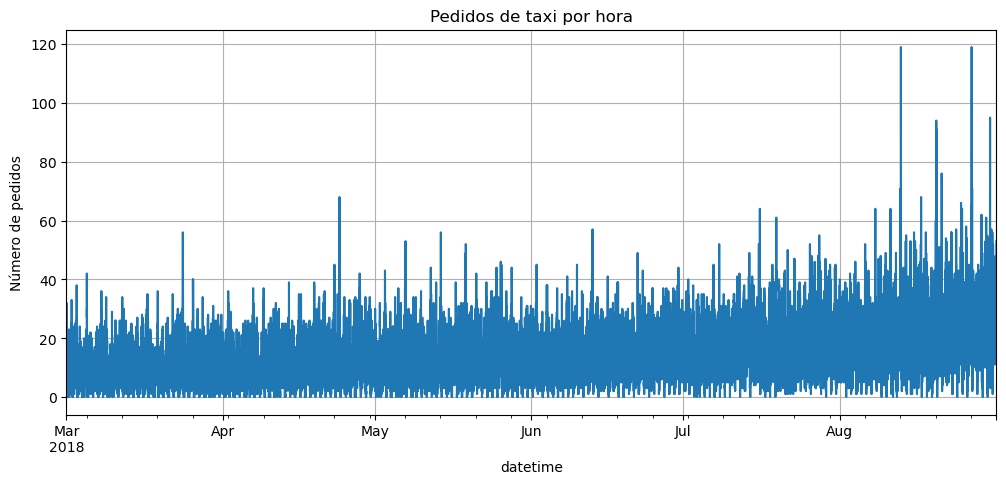

In [29]:
# Visualización de la serie temporal
plt.figure(figsize=(12, 5))
df['num_orders'].plot(title='Pedidos de taxi por hora')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

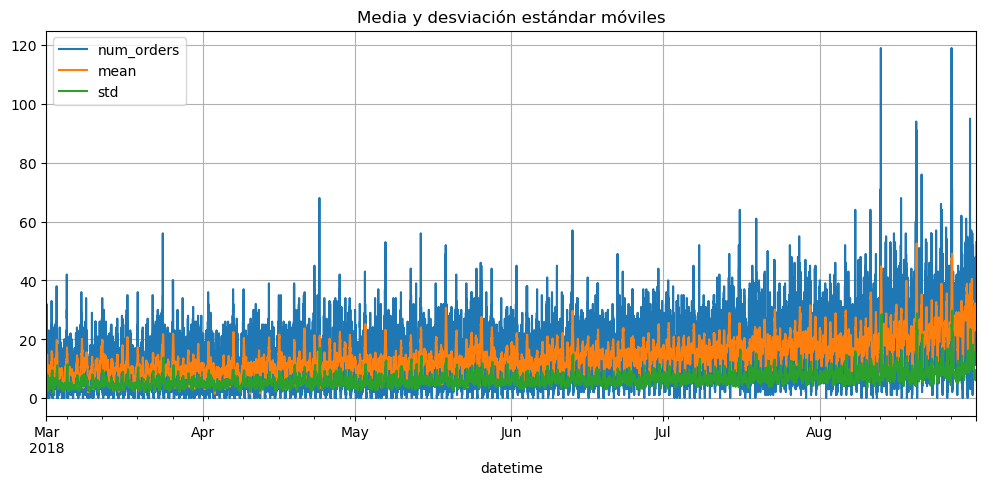

In [30]:
# Estadísticas móviles
df['mean'] = df['num_orders'].rolling(24).mean()
df['std'] = df['num_orders'].rolling(24).std()
df[['num_orders', 'mean', 'std']].plot(figsize=(12, 5), title='Media y desviación estándar móviles')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente visualización inicial. El análisis de la serie temporal junto con las estadísticas móviles ayuda a identificar patrones y variabilidad, lo cual es clave para ajustar un modelo de predicción preciso.  
</div>


## Formación

In [31]:
# Ingeniería de características
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    for lag in range(1, max_lag + 1):
        data[f'lag_{lag}'] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

In [32]:
# Aplicar ingeniería de características
df = make_features(df, max_lag=6, rolling_mean_size=3)
df = df.dropna()


In [33]:
# Separar conjunto de entrenamiento y prueba
train_size = int(len(df) * 0.9)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

features = ['hour', 'dayofweek', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'rolling_mean']
target = 'num_orders'

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

In [34]:
# Función para evaluar modelos
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
    start_train = time.time()
    modelo.fit(X_train, y_train)
    end_train = time.time()
    tiempo_entrenamiento = end_train - start_train

    start_pred = time.time()
    pred = modelo.predict(X_test)
    end_pred = time.time()
    tiempo_prediccion = end_pred - start_pred

    rmse = mean_squared_error(y_test, pred) ** 0.5
    return rmse, tiempo_entrenamiento, tiempo_prediccion

In [35]:
# Instanciar modelos
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=10, random_state=12345)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=12345, n_jobs=-1)

In [36]:
# Evaluar modelos
rmse_lr, tiempo_lr_fit, tiempo_lr_pred = evaluar_modelo(lr, X_train, y_train, X_test, y_test)
rmse_dt, tiempo_dt_fit, tiempo_dt_pred = evaluar_modelo(dt, X_train, y_train, X_test, y_test)
rmse_rf, tiempo_rf_fit, tiempo_rf_pred = evaluar_modelo(rf, X_train, y_train, X_test, y_test)

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en la creación de características temporales y en la preparación del conjunto de entrenamiento y prueba. Además, el uso de distintas arquitecturas de modelos con medición de tiempos demuestra una estrategia comparativa robusta.  
</div>


## Prueba

In [37]:
# Mostrar resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'RECM': [rmse_lr, rmse_dt, rmse_rf],
    'Tiempo de Entrenamiento (s)': [tiempo_lr_fit, tiempo_dt_fit, tiempo_rf_fit],
    'Tiempo de Predicción (s)': [tiempo_lr_pred, tiempo_dt_pred, tiempo_rf_pred]
})

print(resultados)

              Modelo       RECM  Tiempo de Entrenamiento (s)  \
0   Regresión Lineal   8.623868                     0.017838   
1  Árbol de Decisión  10.213549                     0.101658   
2      Random Forest   8.892338                     0.896061   

   Tiempo de Predicción (s)  
0                  0.008361  
1                  0.000000  
2                  0.053045  


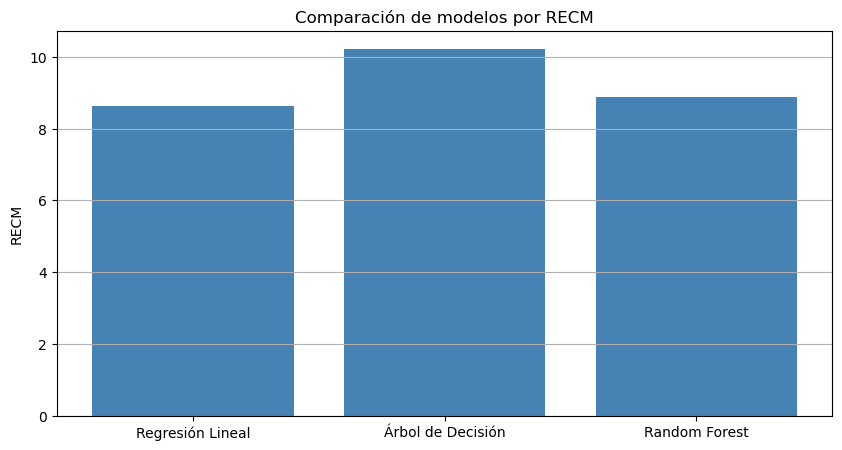

In [38]:
# Visualización de resultados
plt.figure(figsize=(10, 5))
plt.bar(resultados['Modelo'], resultados['RECM'], color='steelblue')
plt.title('Comparación de modelos por RECM')
plt.ylabel('RECM')
plt.grid(axis='y')
plt.show()


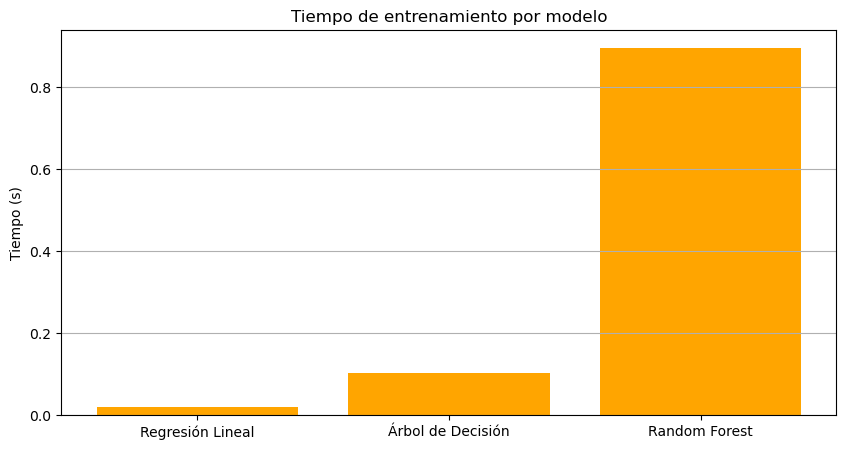

In [39]:
plt.figure(figsize=(10, 5))
plt.bar(resultados['Modelo'], resultados['Tiempo de Entrenamiento (s)'], color='orange')
plt.title('Tiempo de entrenamiento por modelo')
plt.ylabel('Tiempo (s)')
plt.grid(axis='y')
plt.show()

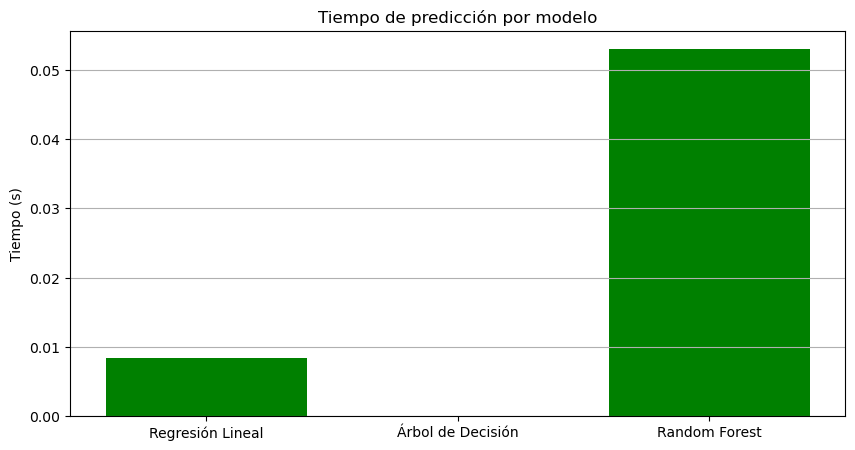

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(resultados['Modelo'], resultados['Tiempo de Predicción (s)'], color='green')
plt.title('Tiempo de predicción por modelo')
plt.ylabel('Tiempo (s)')
plt.grid(axis='y')
plt.show()


## Conclusión

En este proyecto se hizo un modelo para predecir cuántos taxis se van a pedir por hora en un aeropuerto. Se usaron datos históricos de la empresa Sweet Lift Taxi.

Se probaron tres modelos: regresión lineal, árbol de decisión y random forest.
El mejor fue la regresión lineal, con un error de 8.62, mucho menor al límite de 48 que se pedía.

Este modelo puede ayudar a saber cuándo habrá más demanda de taxis y así planear mejor el trabajo de los conductores.

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente cierre del proyecto. Has presentado los resultados comparativos de manera clara y visual, facilitando la elección del mejor modelo. Las gráficas refuerzan bien el análisis cuantitativo.  
</div>


## Comentario general del revisor 



<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades! Tu proyecto está <b>aprobado</b>. Has cumplido con todos los objetivos establecidos, abordando de forma efectiva la predicción de pedidos de taxi por hora con un enfoque bien estructurado en cada etapa. La preparación de datos, la creación de variables temporales y la comparación entre modelos fueron aplicadas con claridad y rigor.

#### Puntos Positivos:

* **Procesamiento de datos:** Buen uso del remuestreo horario y ordenamiento cronológico para estructurar la serie temporal.
* **Visualización y análisis gráfico:** Las gráficas apoyan bien el análisis tanto en la exploración inicial como en la evaluación de resultados.
* **Ingeniería de características:** Muy acertada la incorporación de lags, medias móviles y variables de calendario para capturar patrones temporales.
* **Comparación de modelos:** Excelente análisis comparativo usando RECM, tiempo de entrenamiento y predicción como métricas clave.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Considera explorar formas más eficientes de crear características con pandas o NumPy.
* **Técnicas avanzadas de feature engineering:** Probar interacciones entre variables o características de estacionalidad específicas.
* **Evaluación de modelos más complejos:** Algoritmos como XGBoost o LightGBM podrían ofrecer mejoras en precisión.
* **Validación cruzada en series temporales:** Implementar TimeSeriesSplit para evaluar mejor la capacidad generalizable de los modelos.

¡Muy bien logrado, sigue fortaleciendo tus habilidades en series temporales!

</div>
